# Prometheus 

## Aims
This notebook will look at two datasets:
<b><i> __[Banknote Authentication](https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data)__ & __[StartUp Investments (Crunchbase)](https://www.kaggle.com/arindam235/startup-investments-crunchbase)__</i></b>.<br>
This notebook will analyse both these datasets using visulisations to give a deeper understanding of the dataset and then look at creating models that will help predict classes based on data 



In [2]:
# Importing the libraries used within the notebook.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Banknote Authentication
The first dataset that will be looked at is the Banknote dataset.
# Analysis
The Banknote dataset has 5 coloumns
<ul>
<li>Variance</li><li>Skewness</li><li>Curtosis</li><li>Entropy</li><li>Class</li>
</ul>
The documentation will explain these classes a bit more however the class colum represents whether the Banknote is <b><i>Genuine (0)</b></i> or <b><i>Forged (1)</b></i>

In [3]:
# Loading the dataset
banknotedf = pd.read_csv('BankNote.csv')
banknotedf

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# Count of class
banknotedf["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
# Dataset Summary
banknotedf.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


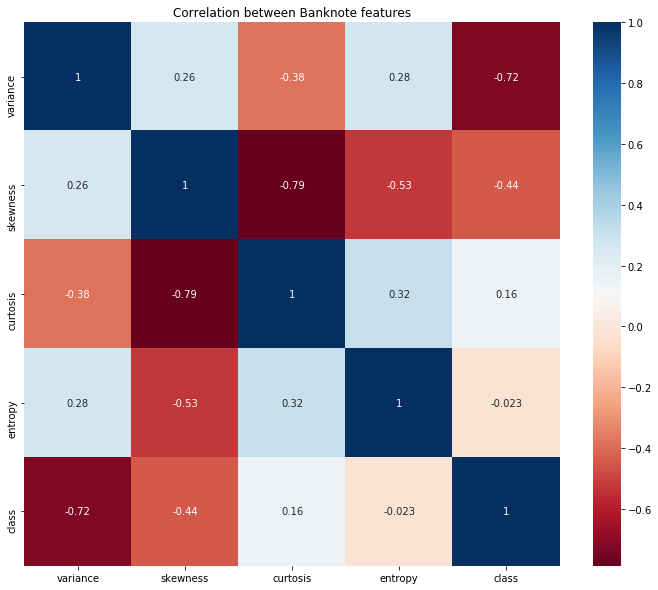

In [6]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(banknotedf.corr(), annot=True, cmap='RdBu')
plt.title("Correlation between Banknote features")
plt.show()

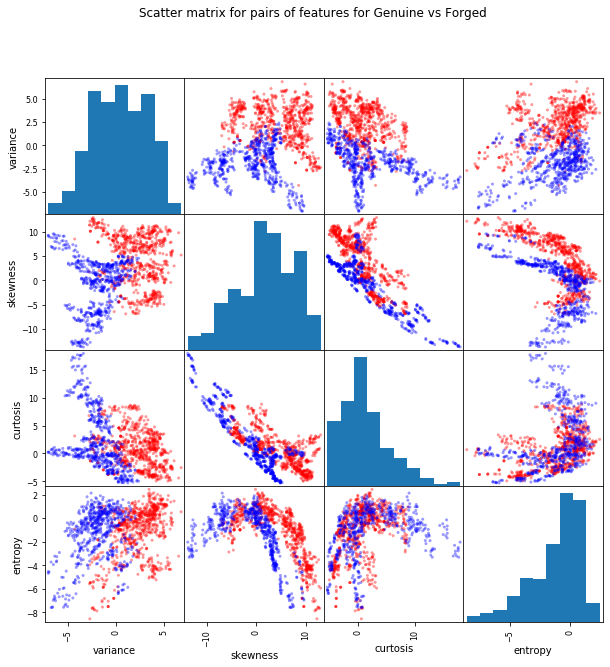

In [7]:
# Scatter Matrix
#Color Labels - 0 is Genuine and 1 is Forged
color_dic = {0:'red', 1:'blue'} 
target_list = list(banknotedf['class'])
colors = list(map(lambda x: color_dic.get(x), target_list))
#Plotting the scatter matrix
sm = pd.plotting.scatter_matrix(banknotedf.iloc[:,:-1], c= colors, alpha=0.4, figsize=((10,10)))
plt.suptitle("Scatter matrix for pairs of features for Genuine vs Forged ")
plt.show()

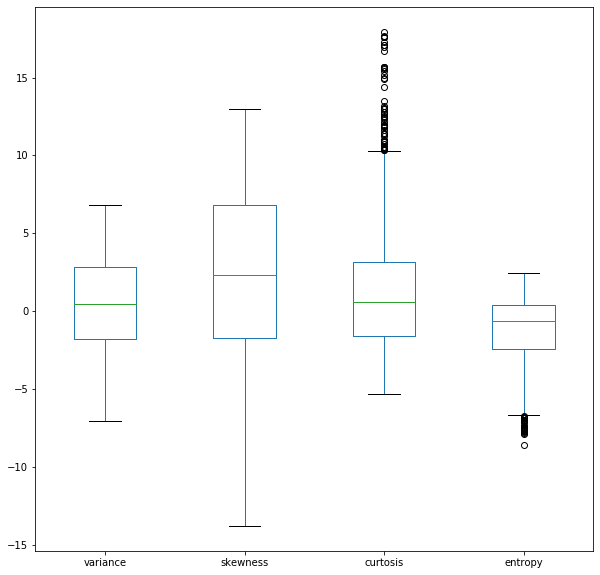

In [8]:
# Boxplot
boxplot=banknotedf.boxplot(figsize=(10,10), grid=False, column=['variance','skewness','curtosis','entropy'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ACE7F54B48>,
      dtype=object)

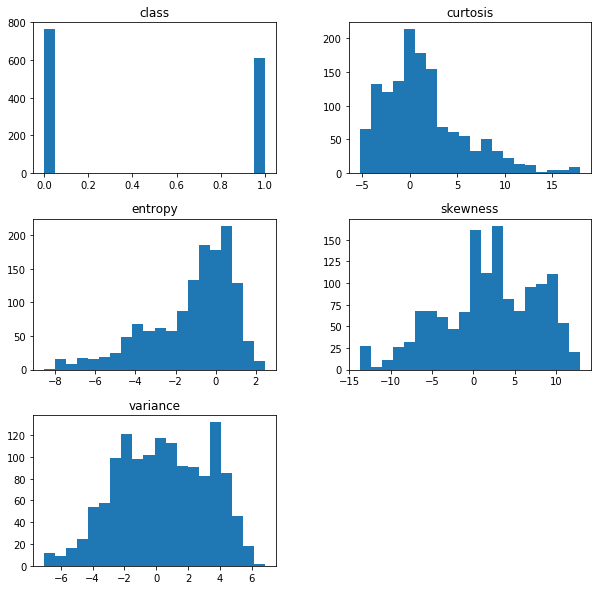

In [9]:
# Histograms
banknotedf.hist(bins=20, grid=False, figsize=(10,10))

# Modeling
The next step models this dataset using several techniques where these trchniques are compared and contrasted in the documentation.<br>
The modeling techniques used are:
<ul>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>Naive Bayes</li>
<li>K-Nearest Neighbor</li>
<li>Logistic Regression</li>
<li>SVM</li>
<li>MLP</li>
</ul>
Each of these classifiers will be used upon the dataset where the accuracy of that specific algorithm will produced


## Dataset Split
The dataset will be split into 80% Training and 20% Test.

In [10]:
#Separate features x from target y, with y being the target class
x = banknotedf.drop(columns=['class'])
y = banknotedf['class']

# Split the dataset 80:20
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a dictonary to store accuracy scores
scores = {}

## A Decision Tree classifier

In [11]:
# Using a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf = dt_clf.fit(x_train, y_train)
dtscore = dt_clf.score(x_test, y_test)

scores['Decision Tree'] = dt_clf
print(f'The Decision Tree achieved an accuracy of: {dtscore*100:.2f}%')

The Decision Tree achieved an accuracy of: 98.91%


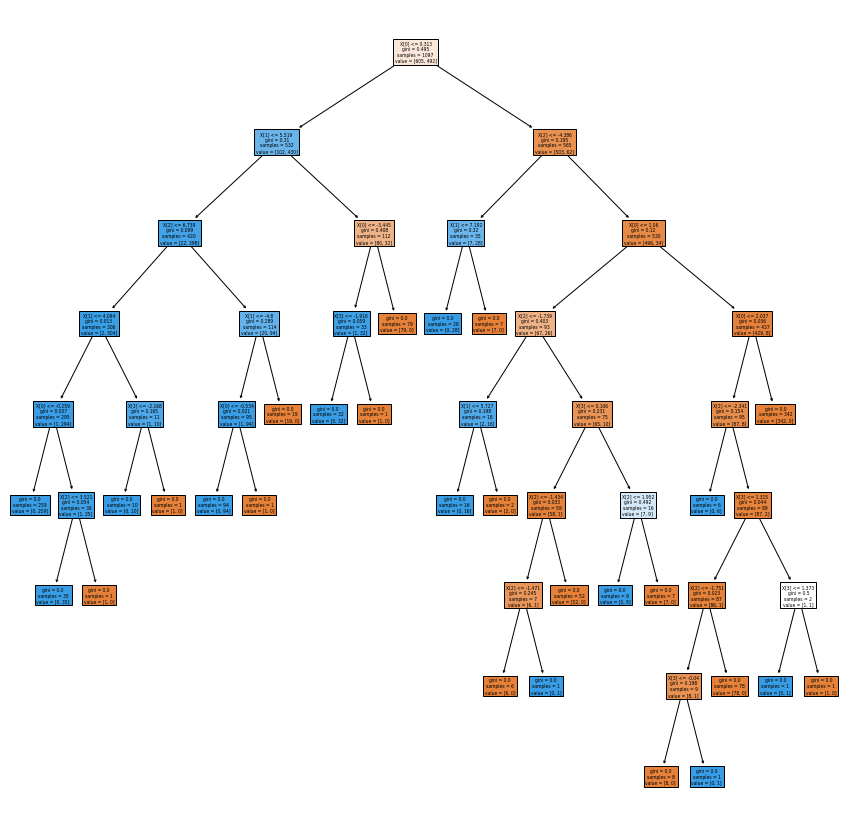

In [12]:
#Decision tree plot
plt.figure(figsize=(15,15))
plot_tree(dt_clf, filled=True)
plt.show()

## Random Forest

In [13]:
# Using Random Forest
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rfscore = rf_clf.score(x_test, y_test)

scores['Random Forest'] = rf_clf
print(f'The Random Forest achieved an accuracy of: {rfscore*100:.2f}%')

The Random Forest achieved an accuracy of: 99.64%


## A Naive Bayes Classifier

In [14]:
# Using a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nbscore = nb_clf.score(x_test, y_test)

scores['Naive Bayes'] = nb_clf
print(f'Naive Bayes achieved an accuracy of: {nbscore*100:.2f}%')

Naive Bayes achieved an accuracy of: 82.55%


## A Logistic Regression Classifier

In [15]:
# Using a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lrscore = lr_clf.score(x_test, y_test)

scores['Logistic Regression'] = lr_clf
print(f'Logistic Regression achieved an accuracy of: {lrscore*100:.2f}%')

Logistic Regression achieved an accuracy of: 99.27%


## SVM classifier

In [16]:
# Using an SVM classifier
from sklearn.svm import SVC

svm_clf = SVC(probability =True)
svm_clf.fit(x_train, y_train)
svmscore = svm_clf.score(x_test, y_test)

scores['SVM'] = svm_clf
print(f'The SVM achieved an accuracy of: {svmscore*100:.2f}%')

The SVM achieved an accuracy of: 99.27%


## Multilayer Perceptron

In [17]:
# Using a MLP classifier
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=700)
mlp_clf.fit(x_train, y_train)
mlpscore = mlp_clf.score(x_test, y_test)

scores['MLP'] = mlp_clf
print(f'The MLP achieved an accuracy of: {mlpscore*100:.2f}%')

The MLP achieved an accuracy of: 99.27%


In [1]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

results = []
for name, model in scores.items():
    kfold = StratifiedKFold(n_splits=20, random_state=1)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)

NameError: name 'scores' is not defined

## Comparing all these classifiers
Using K-Fold Corss Validation and generating a classification report of all the models


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Decision Tree accuracy: 98.33% (+/- 3.22%)
Decision Tree Classification report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Baseline (random guess): ROC AUC=0.500
Decision Tree: ROC AUC=0.990




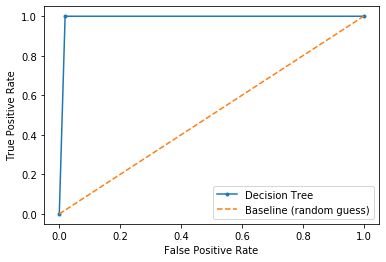

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Random Forest accuracy: 99.35% (+/- 2.15%)
Random Forest Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Baseline (random guess): ROC AUC=0.500
Random Forest: ROC AUC=1.000




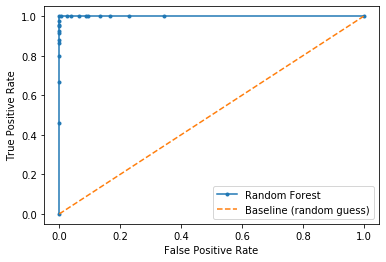

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Naive Bayes accuracy: 84.05% (+/- 8.84%)
Naive Bayes Classification report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.81      0.77      0.79       118

    accuracy                           0.83       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.83      0.82       275

Baseline (random guess): ROC AUC=0.500
Naive Bayes: ROC AUC=0.942




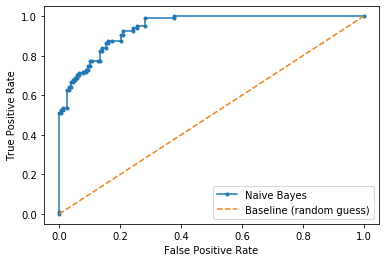

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Logistic Regression accuracy: 98.98% (+/- 2.27%)
Logistic Regression Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Baseline (random guess): ROC AUC=0.500
Logistic Regression: ROC AUC=1.000




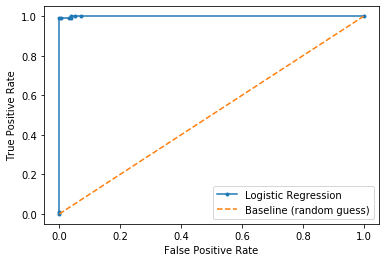

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



SVM accuracy: 99.64% (+/- 1.26%)
SVM Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Baseline (random guess): ROC AUC=0.500
SVM: ROC AUC=1.000




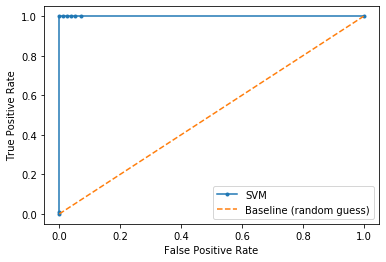

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



MLP accuracy: 98.98% (+/- 2.27%)
MLP Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Baseline (random guess): ROC AUC=0.500
MLP: ROC AUC=1.000




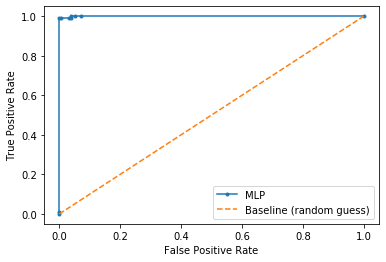

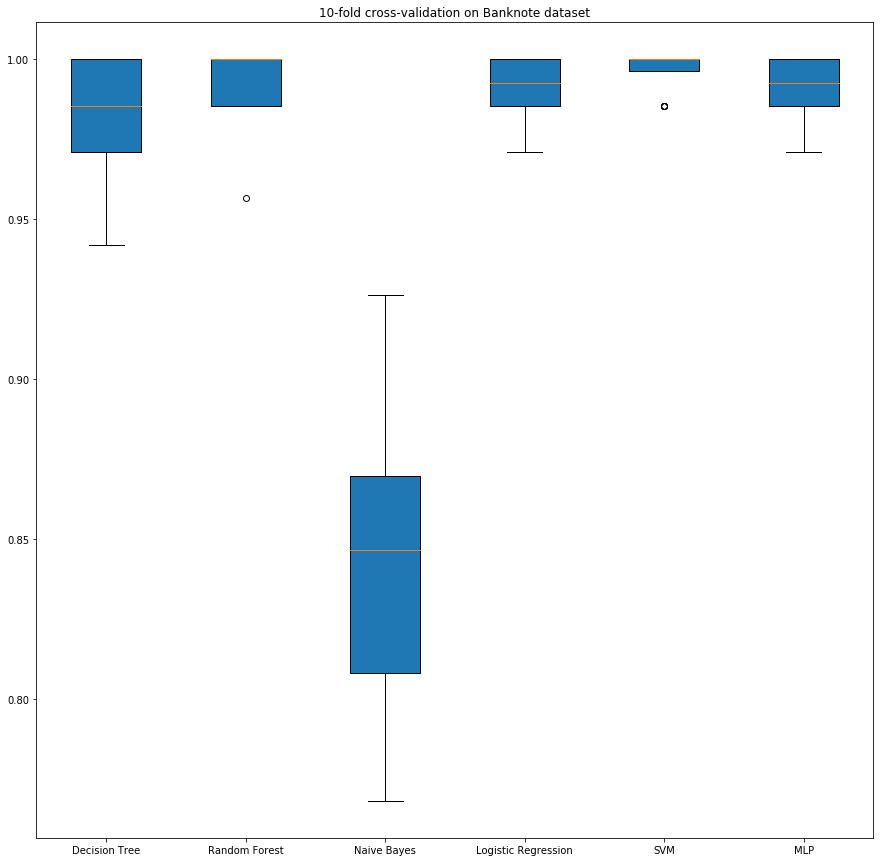

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

results = []
for name, model in scores.items():
    kfold = StratifiedKFold(n_splits=20, random_state=1)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)

    print(f"\n{name} accuracy: {cv_results.mean()*100:0.2f}% (+/- {cv_results.std()*100*2:0.2f}%)")
    print(f'{name} Classification report:\n\n{classification_report(y_test, model.predict(x_test))}')

    #ROC Curve
    # generate a random prediction (majority class)
    r_probs = [0 for _ in range(len(y_test))]
    model_probs = model.predict_proba(x_test)[:, 1]
    #model_probs = model_probs[:, 1]
    # calculate accuracy score for random prediction model
    r_auc = roc_auc_score(y_test, r_probs)

    # calculate accuracy score different models
    model_auc = roc_auc_score(y_test, model_probs)

    # summarize scores
    print(f'Baseline (random guess): ROC AUC={r_auc:.3f}')
    print(f'{name}: ROC AUC={model_auc:.3f}\n\n')

    # calculate roc curves
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

    # plot the roc curve for the models 
    plt.plot(model_fpr, model_tpr, marker='.', label=f'{name}')

    ### TO PLOT EACH ROC CURVE INDIVIDUALLY LEAVE CODE BLOCK INSIDE LOOP
    ### TO PLOT EACH ROC CURVE ON ONE PLOT MOVE CODE BLOCK OUTSIDE LOOP
    ### START CODE BLOCK ###
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Baseline (random guess)')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend and title
    plt.legend()
    #plt.title(f'{name} ROC AUC curve')
    # show the plot
    plt.show()
    ### END CODE BLOCK ###


# Compare Algorithms
plt.figure(figsize=(15,15))
plt.boxplot(results, vert=1, patch_artist=True, labels=scores.keys())
plt.title('10-fold cross-validation on Banknote dataset')
plt.show()


# Startups Dataset
The next dataset that will be looked at is the Startups dataset.

The Startups dataset has 39 coloumns which is too many to explain in this notebook, but will be explained in the documentation. However the most important classes that will eventually be used for modeling are the classes:
<ul>
<li>Market</li><li>Country Code</li><li>Funding Total USD</li><li>Funding Rounds</li><li>Class</li><li>Status</li>
</ul>
The documentation will explain these classes in particular, abit more however the Status column is turned into the label column. The aim of the modeling is to find out whether it is possible to model the outcome of a startup using the data in the columns above. The possible outcomes are <b><i>Closed (0)</b></i>, <b><i>Operating (1)</b></i> or <b><i>Acquired (2)</b></i>.

## Cleaning Data

In [19]:
# Load the dataset
startupsdf = pd.read_csv('investments_VC.csv', engine='python')
startupsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

The dataset contains a lot of redundant data for what we are looking for and a lot more columns could be dropped however most of them will be left in for analysis and then a new dataframe will be created to look at modeling the specific columns mentioned earlier.  

In [20]:
# Irelivent columns never used
startupsdf = startupsdf.drop(['permalink', 'homepage_url'], axis=1)

# Columns formated badly in CSV file
startupsdf.rename(columns={' market ':'market',' funding_total_usd ':'funding_total_usd'},inplace=True)

# Convert funding to int as its currently a str
startupsdf.funding_total_usd=startupsdf.funding_total_usd.str.replace(",",'').str.replace(' ',"")
startupsdf.funding_total_usd=startupsdf.funding_total_usd.replace("-",np.nan).astype('float',errors='ignore')

# Analysis

## Time period of data
The first startup on this list dates back to 1902. This can skew the data so its important to bear that in mind

In [21]:
startupsdf['founded_year'].describe()

count    38482.000000
mean      2007.359129
std          7.579203
min       1902.000000
25%       2006.000000
50%       2010.000000
75%       2012.000000
max       2014.000000
Name: founded_year, dtype: float64

In [22]:
startupsdf['founded_year'].nsmallest(10)

42802    1902.0
49126    1902.0
39383    1903.0
24625    1905.0
7862     1906.0
22312    1906.0
23907    1906.0
31052    1906.0
48198    1906.0
45071    1907.0
Name: founded_year, dtype: float64

In [23]:
startupsdf.nsmallest(10, 'founded_year')

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
42802,The Miriam Hospital,|Clinical Trials|Health and Wellness|Non Profit|,Health and Wellness,2.000000e+07,operating,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
49126,Ziegler,|Financial Services|,Financial Services,2.167500e+07,operating,USA,IL,Chicago,Chicago,2,...,0,0,0,0,0,0,0,0,0,0
39383,SodaStream,|Consumer Electronics|Entertainment|Health and...,Consumer Electronics,9.300000e+06,operating,ISR,NaN,Tel Aviv,Lod,1,...,0,0,0,0,0,0,0,0,0,0
24625,Loma Linda University,NaN,NaN,6.000000e+05,operating,USA,CA,Ontario - Inland Empire,Loma Linda,1,...,0,0,0,0,0,0,0,0,0,0
7862,CES Acquisition Corp,NaN,NaN,6.000000e+06,operating,USA,MD,Baltimore,Hunt Valley,2,...,0,0,0,0,0,0,0,0,0,0
22312,Justrite Manufacturing,NaN,NaN,1.480000e+07,operating,USA,IL,"Springfield, Illinois",Mattoon,1,...,0,0,0,0,0,0,0,0,0,0
23907,Liberator Medical Supply,|Health and Wellness|,Health and Wellness,7.000000e+06,operating,USA,FL,Florida's Treasure Coast,Stuart,1,...,0,0,0,0,0,0,0,0,0,0
31052,Owensboro Grain,|Manufacturing|,Manufacturing,1.000000e+07,operating,USA,KY,KY - Other,Owensboro,1,...,0,0,0,0,0,0,0,0,0,0
48198,Xerox,|Hardware + Software|,Hardware + Software,1.100000e+09,operating,USA,AL,AL - Other,Normal,1,...,0,0,0,0,0,0,0,0,0,0
45071,University of Hawaii,NaN,NaN,1.100000e+07,operating,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0


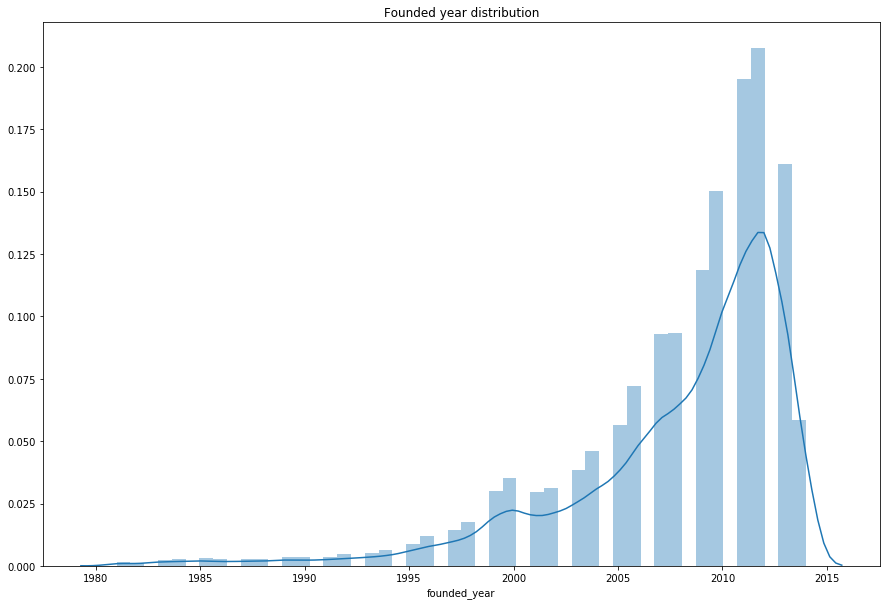

In [24]:
founded_year=startupsdf[~startupsdf.founded_year.isna()]['founded_year'].astype('int')
plt.figure(figsize=(15,10))
sns.distplot(founded_year[founded_year>1980])
plt.title('Founded year distribution')
plt.show()

## Null Values
Next the average number of null values in a column can be worked out

In [25]:
# Finding out the percentage of null values there are in each column
df_null=(startupsdf.isna().mean() * 100).to_frame()
df_null.style.background_gradient(cmap='Blues')

,0
name,0.002023
category_list,8.012056
market,8.026215
funding_total_usd,17.255957
status,2.657875
country_code,10.665885
state_code,38.992273
region,10.665885
city,12.371051
funding_rounds,0.000000


## Distribution accross the countries
As seen the top 5 countries are USA, Great Britian, Canada, China & Germany
These top countries hold the majority share of startups on this list

In [26]:
# Info about the country code column
startupsdf['country_code'].describe()

count     44165
unique      115
top         USA
freq      28793
Name: country_code, dtype: object

In [27]:
# Number of rows containing the top 10 country codes
startupsdf['country_code'].value_counts()[:10]

USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
FRA      866
IND      849
ISR      682
ESP      549
RUS      368
Name: country_code, dtype: int64

## Current status of the startup (As of when the dataset was published)

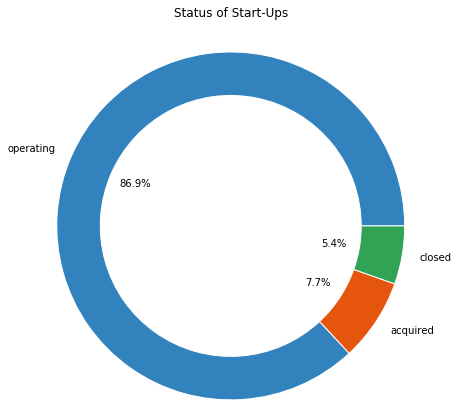

In [28]:
# Status of the startups
status=startupsdf.status.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.pie(status.values, radius=2, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Status of Start-Ups',pad=100)
plt.show()

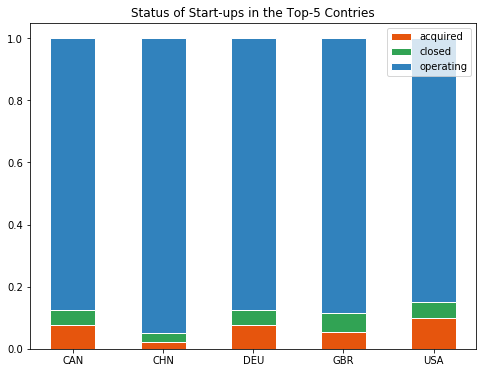

In [29]:
# Status of startups in top 5 countries
plt.figure(figsize=(8,6))
status_cont=startupsdf.groupby('country_code')['status'].value_counts(normalize=True)
cont=['USA','GBR','CAN','CHN', 'DEU']
status_cont=status_cont.loc[cont].unstack().T
plt.bar(status_cont.columns,status_cont.loc['acquired'],color=outer_colors[1],label='acquired',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['closed'],bottom=status_cont.loc['acquired'],color=outer_colors[2],label='closed',width=0.5,edgecolor='w')
plt.bar(status_cont.columns,status_cont.loc['operating'],bottom=status_cont.loc['closed']+status_cont.loc['acquired'],color=outer_colors[0],label='operating',width=0.5,edgecolor='w')
plt.legend()
plt.title('Status of Start-ups in the Top-5 Contries')
plt.show()

## Markets and Status

In [30]:
# Top markets with number of occurances
market=startupsdf.market.value_counts()
market[(market>1000)][0:10]
market=market[(market>1000)][0:10].to_frame()
market_con=startupsdf.groupby('country_code')['market'].value_counts().to_frame()
market

,market
Software,4620
Biotechnology,3688
Mobile,1983
E-Commerce,1805
Curated Web,1655
Enterprise Software,1280
Health Care,1207
Clean Technology,1200
Games,1182
Hardware + Software,1081


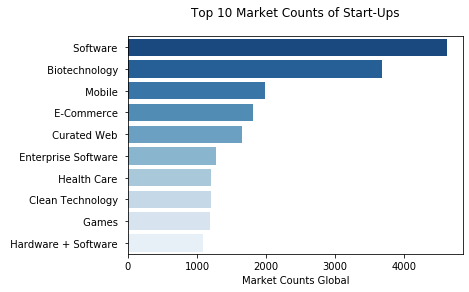

In [31]:
# Plot of top 10 market counts 
plt.figure()
ax1=sns.barplot(y=market.index,x=market.market,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Counts of Start-Ups',pad=20)
ax1.set_xlabel('Market Counts Global')
plt.show()

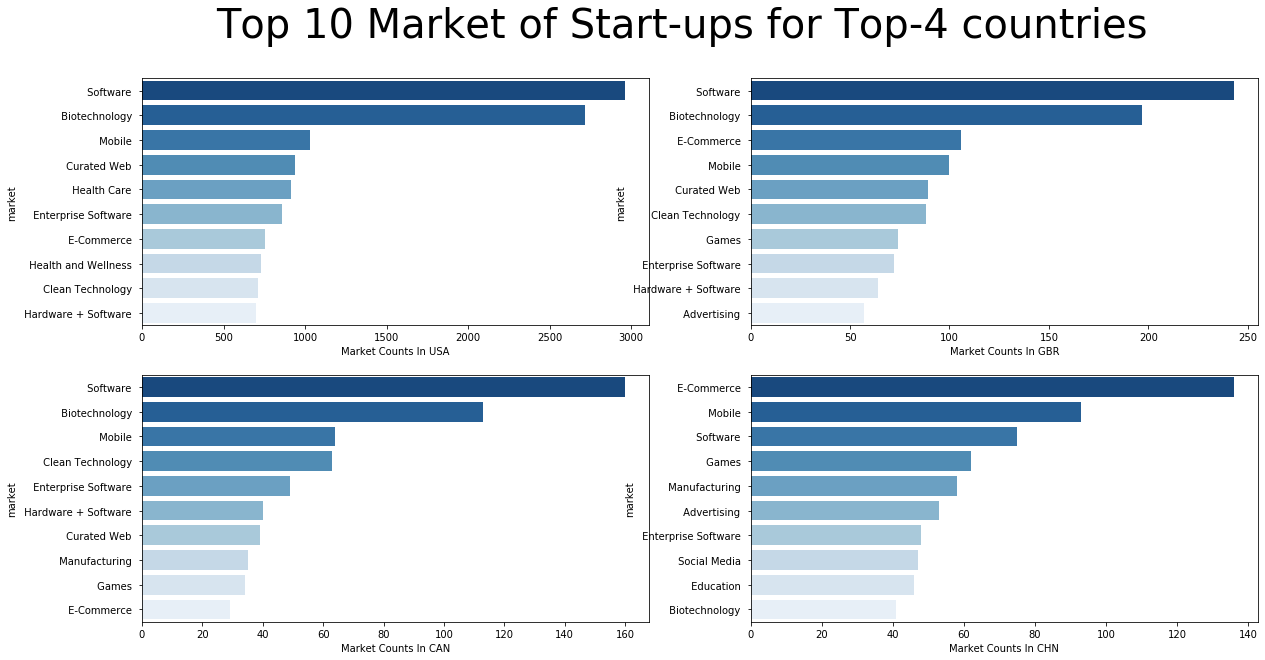

In [32]:
# Plot of top 10 market counts in the top four countries
fig,axes=plt.subplots(2,2,figsize=(20,10))
cont=['USA','GBR','CAN','CHN']
for con,ax in zip(cont,range(1,5)):
    ax=plt.subplot(2,2,ax)
    ax=sns.barplot(y=market_con.loc[con].index[0:10],x=market_con.loc[con].market[0:10],orient='h',palette='Blues_r')
    ax.set_xlabel('Market Counts In {}'.format(con))
plt.suptitle('Top 10 Market of Start-ups for Top-4 countries',size=40)
plt.show()

In [33]:
# Markets that most start-ups closed
top_markets=(startupsdf.market.value_counts()[startupsdf.market.value_counts()>24]).index
# We chose top markets to analyze,which are greater than 24 startups in that market.
sub_data=startupsdf[startupsdf.market.isin(top_markets)]

status_market_1=sub_data.groupby('market')['status'].value_counts(normalize=True).to_frame()
status_market_1.columns=['prop']
status_market_2=sub_data.groupby('market')['status'].value_counts().to_frame()
status_market_2.columns=['quantity']
status_market=pd.concat([status_market_1,status_market_2],axis=1)
status_market.reset_index()
status_market_closed=status_market.query('status=="closed"').reset_index(level=1)
status_market_closed.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Reds',subset=['prop']).set_caption('Markets that most start-ups closed')

,status,prop,quantity
market,,,
Public Relations,closed,0.204678,35
Coupons,closed,0.200000,7
VoIP,closed,0.172414,5
Facebook Applications,closed,0.169014,12
Location Based Services,closed,0.166667,10
Web Tools,closed,0.159091,7
iPhone,closed,0.156250,10
Curated Web,closed,0.155215,253
Social Network Media,closed,0.140351,24


In [34]:
# Markets that least start-ups closed
status_market_closed.sort_values(by='prop',ascending=True)[0:10].style.background_gradient(cmap='Greens_r',subset=['prop']).set_caption('Markets that least start-ups closed')

,status,prop,quantity
market,,,
Medical,closed,0.007722,2
Technology,closed,0.007968,2
Consumer Electronics,closed,0.009259,1
Information Technology,closed,0.011236,1
Transportation,closed,0.012422,2
Services,closed,0.012658,1
Wireless,closed,0.013514,1
Telecommunications,closed,0.015152,1
Brand Marketing,closed,0.015152,1


In [35]:
# Markets that most start-ups aquired
status_market_acquired=status_market.query('status=="acquired"').reset_index(level=1)
status_market_acquired.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Blues',subset=['prop']).set_caption('Markets that most start-ups acquired')

,status,prop,quantity
market,,,
Chat,acquired,0.241379,7
Cloud Management,acquired,0.240000,6
Storage,acquired,0.232143,13
VoIP,acquired,0.206897,6
Web Hosting,acquired,0.193622,85
Wireless,acquired,0.189189,14
Semiconductors,acquired,0.179074,89
Video Streaming,acquired,0.174603,11
Security,acquired,0.171875,88


## Funding of Startups

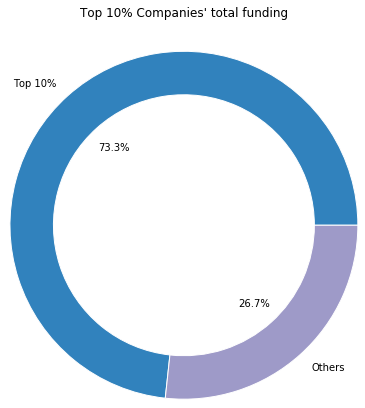

In [36]:
# Find out the total proportion of funding that went to the top 10% of companies.
top_fund=(startupsdf.funding_total_usd.sort_values(ascending=False)[1:(int(startupsdf.shape[0]*0.1))].sum())/(startupsdf.funding_total_usd.sort_values(ascending=False).sum())

plt.figure()
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*13)
plt.pie([top_fund,1-top_fund], radius=2, colors=outer_colors,labels=['Top 10%','Others'],autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Top 10% Companies\' total funding',pad=100)
plt.show()

In [37]:
# Graph of total funding per market
startupsdf.sort_values(ascending=False,by='funding_total_usd')[['name','funding_total_usd']][0:10]\
.style.hide_index().background_gradient(subset = 'funding_total_usd',cmap='Blues')

name,funding_total_usd
Verizon Communications,30079503000.000000
Sberbank,5800000000.000000
Clearwire,5700000000.000000
Charter Communications,5162513431.000000
First Data Corporation,3500000000.000000
COFCO,3200000000.000000
sigmacare,2600000000.000000
Facebook,2425700000.000000
Carestream,2400000000.000000
Flipkart,2351140000.000000


In [38]:
#%%time
category_list=startupsdf.category_list.str.split('|').to_list()
categ=[]

for i in category_list:
    if isinstance(i,list):
        categ=categ+i
categ=list(filter(None,categ))

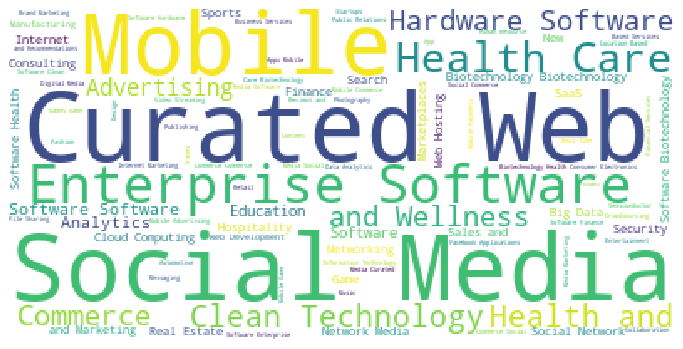

In [39]:
# Make a word cloud using the words in the market column
import wordcloud
categ=' '.join(categ)
w=wordcloud.WordCloud(background_color='White')
fig = plt.figure(figsize=(12, 8))
w.generate(categ)
plt.axis('off')
plt.imshow(w)

In [40]:

startupsdf.groupby('status')['funding_rounds'].describe().style.highlight_max(subset=['count', 'max','75%','50%','std','mean'],color='lightgreen')

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.000000,2.013814,1.398832,1.000000,1.000000,2.000000,3.000000,15.000000
closed,2603.000000,1.434114,0.965478,1.000000,1.000000,1.000000,2.000000,11.000000
operating,41829.000000,1.689522,1.302072,1.000000,1.000000,1.000000,2.000000,18.000000


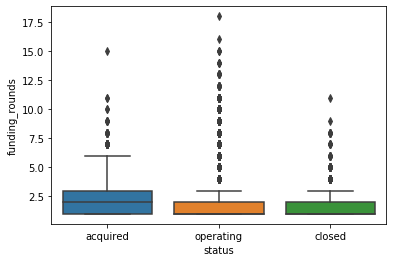

In [41]:
sns.boxplot(data=startupsdf,x='status',y='funding_rounds')

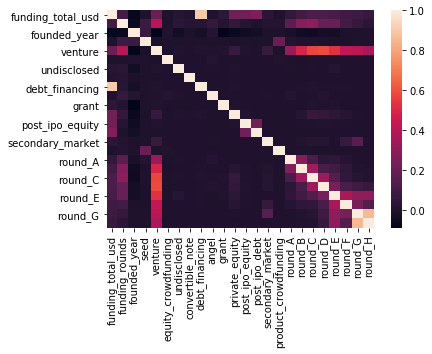

In [42]:
sns.heatmap(startupsdf.corr())
plt.show()

# Modeling
The next step models this dataset using several techniques where these techniques are compared and contrasted in the documentation. However, before modleing the inputs need to be categorised and normalised

In [43]:
# Creating the labels column
startupsdf['status'].head()
startupsdf['labels'] = startupsdf['status']
startupsdf['status'].describe()
startupsdf['labels'].replace(('acquired', 'operating', 'closed'), (2, 1, 0), inplace=True)

In [1]:
# Next the selected columns are put into the new dataframe with all null values removed
cols = ['market', 'country_code', 'funding_total_usd', 'funding_rounds', 'labels']
originalsize = startupsdf[cols].shape[0]
startupsdf = startupsdf.dropna(subset = cols)
droppedsize = startupsdf[cols].shape[0]
print(f'Number of rows dropped due to null values:  {originalsize} - {droppedsize} = {originalsize-droppedsize}')
cols.pop()
for col in cols:   
    print(startupsdf[col].describe())
    
#Separate features x from target y, with y being the target class
x = startupsdf[cols]
y = startupsdf['labels']

NameError: name 'startupsdf' is not defined

In [45]:
x

,market,country_code,funding_total_usd,funding_rounds
0,News,USA,1750000.0,1
1,Games,USA,4000000.0,2
2,Publishing,EST,40000.0,1
3,Electronics,GBR,1500000.0,1
4,Tourism,USA,60000.0,2
...,...,...,...,...
49432,Biotechnology,AUT,2686600.0,1
49433,Education,GBR,320000.0,1
49434,Enterprise Software,CHN,1587301.0,1
49435,Web Development,HRV,97398.0,5


In [46]:
y

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
49432    1.0
49433    1.0
49434    1.0
49435    1.0
49437    1.0
Name: labels, Length: 34492, dtype: float64

In [47]:
import category_encoders as ce

ce_ord = ce.OrdinalEncoder(cols = ['market', 'country_code'])
x = ce_ord.fit_transform(x, y)

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
funding_total_max = x['funding_total_usd'].max()
funding_rounds_max = x['funding_rounds'].max()
x['funding_total_usd'] = x['funding_total_usd'] / x['funding_total_usd'].max()
x['funding_rounds'] = x['funding_rounds'] / x['funding_rounds'].max()

In [ ]:
x

In [ ]:
y

## Dataset Split
The dataset will be split into 80% Training and 20% Test.

In [ ]:
# Split the dataset 80:20
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a dictonary to store accuracy scores
scores = {}

## Modeling

The modeling techniques used are:
<ul>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>Naive Bayes</li>
<li>K-Nearest Neighbor</li>
<li>Logistic Regression</li>
<li>SVM</li>
<li>MLP</li>
</ul>
Each of these classifiers will be used upon the dataset where the accuracy of that specific algorithm will produced

## A Decision Tree Classifier

In [ ]:
# Using a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf = dt_clf.fit(x_train, y_train)
dtscore = dt_clf.score(x_test, y_test)

scores['Decision Tree'] = dt_clf
print(f'The Decision Tree achieved an accuracy of: {dtscore*100:.2f}%')

In [ ]:
#Decision tree plot
### This code block is commented out as it takes too long to run

#plt.figure(figsize=(50,50))
#plot_tree(dt_clf, filled=True)
#plt.show()

## A Random Forest Classifier

In [ ]:
# Using Random Forest
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rfscore = rf_clf.score(x_test, y_test)

scores['Random Forest'] = rf_clf
print(f'The Random Forest achieved an accuracy of: {rfscore*100:.2f}%')

## A Naive Bayes Classifier

In [ ]:
# Using a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nbscore = nb_clf.score(x_test, y_test)

scores['Naive Bayes'] = nb_clf
print(f'Naive Bayes achieved an accuracy of: {nbscore*100:.2f}%')

## A Logistic Regression Classifier

In [ ]:
# Using a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lrscore = lr_clf.score(x_test, y_test)

scores['Logistic Regression'] = lr_clf
print(f'Logistic Regression achieved an accuracy of: {lrscore*100:.2f}%')

## A SVM Classifier

In [ ]:
# Using an SVM classifier
from sklearn.svm import SVC

svm_clf = SVC(probability =True)
svm_clf.fit(x_train, y_train)
svmscore = svm_clf.score(x_test, y_test)

scores['SVM'] = svm_clf
print(f'The SVM achieved an accuracy of: {svmscore*100:.2f}%')

## Multilayer Perceptron

In [ ]:
# Using a MLP classifier
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=700)
mlp_clf.fit(x_train, y_train)
mlpscore = mlp_clf.score(x_test, y_test)

scores['MLP'] = mlp_clf
print(f'The MLP achieved an accuracy of: {mlpscore*100:.2f}%')

## Comparing all these classifiers
Using K-Fold Corss Validation and generating a classification report of all the models

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

results = []
for name, model in scores.items():
    kfold = StratifiedKFold(n_splits=20, random_state=1)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)

    print(f"\n{name} accuracy: {cv_results.mean()*100:0.2f}% (+/- {cv_results.std()*100*2:0.2f}%)")
    print(f'{name} Classification report:\n\n{classification_report(y_test, model.predict(x_test))}')


# Compare Algorithms
plt.figure(figsize=(15,15))
plt.boxplot(results, vert=1, patch_artist=True, labels=scores.keys())
plt.title('10-fold cross-validation on Startups dataset')
plt.show()